# CSP Page Data

The purpose of this notebook is to explore, quantify, and visualize basic Facebook metrics to see how much Facebook user interactions the CSP Facebook page creates on a monthly basis. This file is name CSP Business Intelligence because we are looking into the past in order to figure out how well the page has done over time and look for possible areas of improvement rather than trying predict anything. This data will be used to try and look for areas of improvement and collect additional data.

In [12]:
# Intall packages we'll use and print success when finished. 
# Not all these packages will be used in this notebook, but it is good practice

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
print("Success!!")

Success!!


We haven't written scripts (yet) to process the Facebook data in one fell swoop. As such, we will have to ensure that the data is in the right format, repeating some processes from the Prepare Notebook in this one to make the data workable in the way we intend. As such, we need to make sure that the columns are in the right format and reindext the dataframe to use date as the index. We will handle that process below. 

In [13]:
# First let's pull in our Facebook Data into a pandas data frame
CSP = pd.read_csv('CSP.csv')
# Then convert all the columns execpt date into a numeric format
CSP = CSP.apply(pd.to_numeric, errors='ignore')
# Then put the date in a numeric format
CSP['Date'] = pd.to_datetime(CSP['Date'])
# Then put reindex the data frame using the date column
CSP.set_index(CSP["Date"],inplace=True)
# Print the types to check and get a list of columbns
CSP.dtypes

Date                        datetime64[ns]
Page Likes                           int64
Unlikes                              int64
New Follows                          int64
Engaged Users                        int64
Post Engagements                     int64
Total Reach                          int64
Nonviral Reach                       int64
Organic Reach                        int64
Viral Reach                          int64
Paid Reach                           int64
Talking About This                   int64
Action Counts                        int64
Website Clicks                       int64
Lifetime Total Likes                 int64
Anger                                int64
Haha                               float64
Likes                              float64
Love                               float64
Sad                                float64
Wow                                float64
Lifetime Likes - AU                  int64
Lifetime Likes - BE                float64
Lifetime Li

Now that we have the base data frame in the right format we can start slicing the data frame into section we wish to look at for analysis. The date split ups you will choose is entirely up to you, but for the purposes of this notebook we will simply resample the data frame into monthly and yearly data frames and leave the base data frame untouched just in case we want/need to manipulate the data further (adding columns or what not). Additionally, we will, for now, drop the life-time columns completely from our aggregated data frames to avoid confusion. We will do that below and start by looking at the yearly data to see the improvement from 1 year to the next quickly and easily

In [38]:
# Print the columns to get a list of the column names
CSP.columns

Index(['Date', 'Page Likes', 'Unlikes', 'New Follows', 'Engaged Users',
       'Post Engagements', 'Total Reach', 'Nonviral Reach', 'Organic Reach',
       'Viral Reach', 'Paid Reach', 'Talking About This', 'Action Counts',
       'Website Clicks', 'Lifetime Total Likes', 'Anger', 'Haha', 'Likes',
       'Love', 'Sad', 'Wow', 'Lifetime Likes - AU', 'Lifetime Likes - BE',
       'Lifetime Likes - CA', 'Lifetime Likes - DE', 'Lifetime Likes - DO',
       'Lifetime Likes - DZ', 'Lifetime Likes - ET', 'Lifetime Likes - GB',
       'Lifetime Likes - GH', 'Lifetime Likes - IN', 'Lifetime Likes - MG',
       'Lifetime Likes - MX', 'Lifetime Likes - NZ', 'Lifetime Likes - PK',
       'Lifetime Likes - SN', 'Lifetime Likes - SO', 'Lifetime Likes TH',
       'Lifetime Likes - US', 'Lifetime Likes - ZA',
       'Lifetime Likes - F.18-24', 'Lifetime Likes - F.25-34',
       'Lifetime Likes - F.35-44', 'Lifetime Likes - F.45-54',
       'Lifetime Likes - F.55-64', 'Lifetime Likes - F.65+',
       '

In [39]:
monthly = CSP[['Date', 'Page Likes', 'Unlikes', 'New Follows', 'Engaged Users',
       'Post Engagements', 'Total Reach', 'Nonviral Reach', 'Organic Reach',
       'Viral Reach', 'Paid Reach', 'Talking About This', 'Action Counts',
       'Website Clicks', 'Anger', 'Haha', 'Likes',
       'Love', 'Sad', 'Wow']].resample('M').sum()
yearly = CSP[['Date', 'Page Likes', 'Unlikes', 'New Follows', 'Engaged Users',
       'Post Engagements', 'Total Reach', 'Nonviral Reach', 'Organic Reach',
       'Viral Reach', 'Paid Reach', 'Talking About This', 'Action Counts',
       'Website Clicks', 'Anger', 'Haha', 'Likes',
       'Love', 'Sad', 'Wow']].resample('Y').sum() 
# printing it transposed to show every result
Difference = yearly.iloc[1] - yearly.iloc[0]
print(f"The Difference across all metrics between 2020 (so far) vs 2019 is: \n {Difference}")
yearly

The Difference across all metrics between 2020 (so far) vs 2019 is: 
 Page Likes                 8.0
Unlikes                    6.0
New Follows              102.0
Engaged Users           8809.0
Post Engagements       13007.0
Total Reach           175997.0
Nonviral Reach         10139.0
Organic Reach          51063.0
Viral Reach            41336.0
Paid Reach            124741.0
Talking About This      1385.0
Action Counts             -7.0
Website Clicks            -1.0
Anger                    146.0
Haha                     106.0
Likes                   1055.0
Love                     137.0
Sad                       65.0
Wow                       40.0
dtype: float64


,Page Likes,Unlikes,New Follows,Engaged Users,Post Engagements,Total Reach,Nonviral Reach,Organic Reach,Viral Reach,Paid Reach,Talking About This,Action Counts,Website Clicks,Anger,Haha,Likes,Love,Sad,Wow
Date,,,,,,,,,,,,,,,,,,,
2019-12-31,120,6,122,1901,5958,14419,5925,10504,5149,3798,905,25,2,18,29.0,513.0,43.0,8.0,20.0
2020-12-31,128,12,224,10710,18965,190416,16064,61567,46485,128539,2290,18,1,164,135.0,1568.0,180.0,73.0,60.0


As you can see just by looking at the data frame CSP has improved across the board in all our tracked metrics since 2019. This is a good sign, but it doesn't really tell us much (even though we know the difference from one year to the last). Let's break down the yearly metrics into mothly metrics. 

In [40]:
monthly

,Page Likes,Unlikes,New Follows,Engaged Users,Post Engagements,Total Reach,Nonviral Reach,Organic Reach,Viral Reach,Paid Reach,Talking About This,Action Counts,Website Clicks,Anger,Haha,Likes,Love,Sad,Wow
Date,,,,,,,,,,,,,,,,,,,
2019-01-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2019-02-28,0,0,0,9,19,19,17,18,1,0,4,0,0,0,0.0,1.0,0.0,0.0,0.0
2019-03-31,4,0,4,12,9,14,13,13,0,0,11,0,0,0,0.0,0.0,0.0,0.0,0.0
2019-04-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2019-05-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2019-06-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2019-07-31,8,0,7,162,425,1086,817,1062,316,0,86,7,0,0,5.0,40.0,3.0,3.0,2.0
2019-08-31,14,0,14,228,1053,1913,1364,1845,547,61,149,1,0,1,2.0,132.0,8.0,0.0,5.0
2019-09-30,24,1,25,173,283,1813,537,1305,822,499,80,1,0,0,1.0,41.0,4.0,0.0,0.0


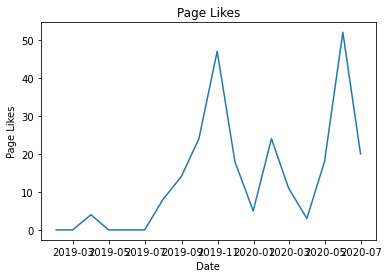

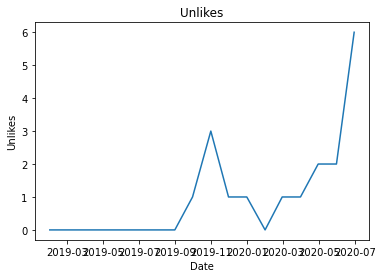

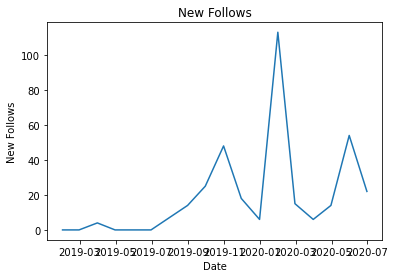

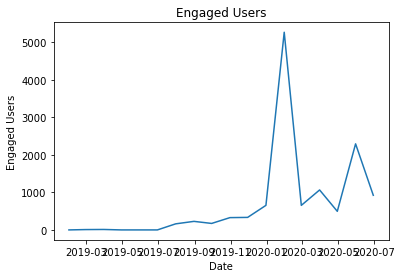

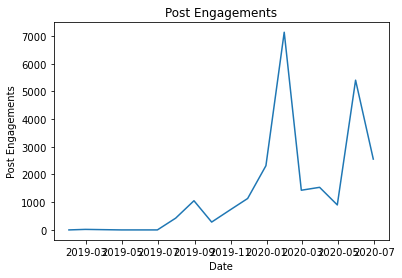

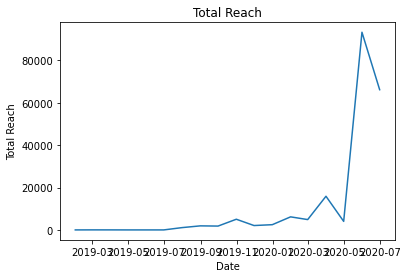

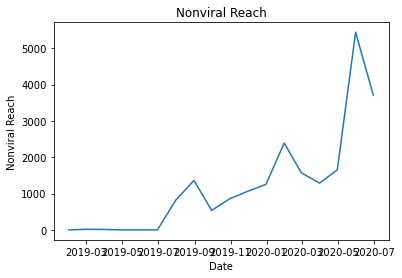

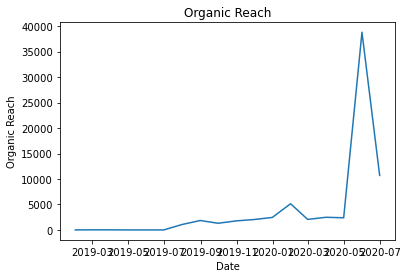

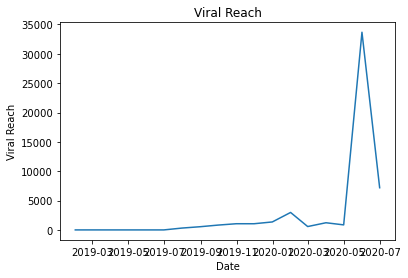

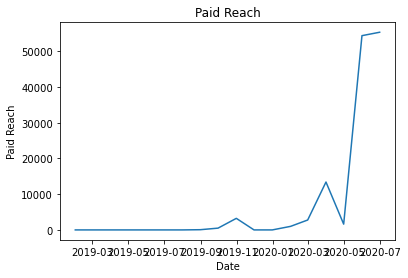

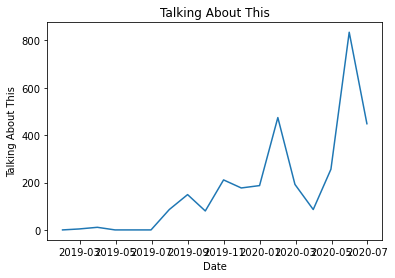

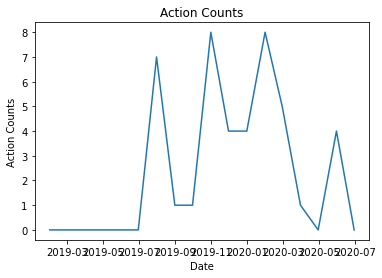

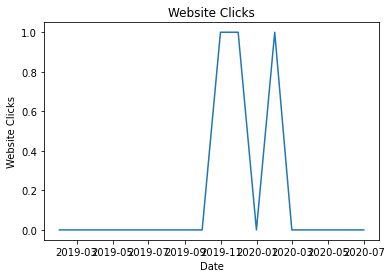

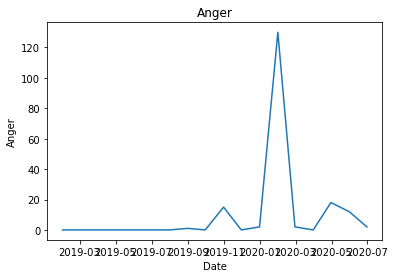

In [46]:
num_cols = monthly.columns[[monthly[col].dtype == 'int64' for col in monthly.columns]]
x = monthly.index
for col in num_cols:
    sns.lineplot(x, monthly[col], data = monthly)
    plt.title(col)
    plt.show()